# **ADDITIONAL MODELS IMPLEMENTED**

In [142]:
# Function to calculate MAPE
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [143]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [144]:
import os 
directory_path = '/content/drive/My Drive/alldata'

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# def parser(s):
#     return datetime.strptime(s, '%d-%m-%Y')

In [147]:
train_data=pd.read_csv(os.path.join(directory_path,'train.csv'))
test_data=pd.read_csv(os.path.join(directory_path,'test.csv'))


In [148]:
train_data

,application_date,segment,branch_id,state,zone,no_of_applicants
0,01-04-2017,1.0,1.0,WEST BENGAL,EAST,40.0
1,01-04-2017,1.0,3.0,DELHI,NORTH,58.0
2,01-04-2017,1.0,5.0,KARNATAKA,SOUTH,10.0
3,01-04-2017,1.0,7.0,WEST BENGAL,EAST,2.0
4,01-04-2017,1.0,8.0,WEST BENGAL,EAST,13.0
...,...,...,...,...,...,...
79917,23-06-2019,2.0,NaN,PUNJAB,NaN,0.0
79918,23-06-2019,2.0,NaN,TAMIL NADU,NaN,3742.0
79919,23-06-2019,2.0,NaN,TRIPURA,NaN,129.0
79920,23-06-2019,2.0,NaN,UTTAR PRADESH,NaN,317.0


In [149]:

train_data['application_date'] = pd.to_datetime(train_data['application_date']) 
test_data['application_date'] = pd.to_datetime(test_data['application_date'])

In [150]:
# Splitting the data into 2 based on the segments
train_data1 = train_data[train_data['segment'] == 1]
train_data1 = train_data1.groupby('application_date')['no_of_applicants'].mean().reset_index()
train_data2 = train_data[train_data['segment'] == 2]
train_data2 = train_data2.groupby('application_date')['no_of_applicants'].mean().reset_index()

test_data1 = test_data[test_data['segment'] == 1]
test_data2 = test_data[test_data['segment'] == 2]

In [151]:
#Converting to datetime datatype
train_data1['application_date'] = pd.to_datetime(train_data1['application_date'])
train_data2['application_date'] = pd.to_datetime(train_data2['application_date'])
test_data1['application_date'] = pd.to_datetime(test_data1['application_date'])
test_data2['application_date'] = pd.to_datetime(test_data2['application_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [152]:
train_data

,application_date,segment,branch_id,state,zone,no_of_applicants
0,2017-01-04,1.0,1.0,WEST BENGAL,EAST,40.0
1,2017-01-04,1.0,3.0,DELHI,NORTH,58.0
2,2017-01-04,1.0,5.0,KARNATAKA,SOUTH,10.0
3,2017-01-04,1.0,7.0,WEST BENGAL,EAST,2.0
4,2017-01-04,1.0,8.0,WEST BENGAL,EAST,13.0
...,...,...,...,...,...,...
79917,2019-06-23,2.0,NaN,PUNJAB,NaN,0.0
79918,2019-06-23,2.0,NaN,TAMIL NADU,NaN,3742.0
79919,2019-06-23,2.0,NaN,TRIPURA,NaN,129.0
79920,2019-06-23,2.0,NaN,UTTAR PRADESH,NaN,317.0


In [153]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79922 entries, 0 to 79921
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   application_date  77432 non-null  datetime64[ns]
 1   segment           77432 non-null  float64       
 2   branch_id         64408 non-null  float64       
 3   state             77432 non-null  object        
 4   zone              64408 non-null  object        
 5   no_of_applicants  77432 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.7+ MB


In [155]:
train_data.isnull().sum()

application_date     2490
segment              2490
branch_id           15514
state                2490
zone                15514
no_of_applicants     2490
dtype: int64

In [156]:
print("\n Unique Values :\n",train_data.nunique())


 Unique Values :
 application_date     814
segment                2
branch_id             83
state                 20
zone                   5
no_of_applicants    3182
dtype: int64


In [157]:
# groupby and sum on the basis of application_date and segment
train_data=train_data.groupby(['application_date','segment'])['no_of_applicants'].mean().reset_index() #sum function

In [158]:
train_data.head()

,application_date,segment,no_of_applicants
0,2017-01-04,1.0,3.602410
1,2017-01-04,2.0,56.062500
2,2017-01-05,1.0,17.734940
3,2017-01-05,2.0,84.625000
4,2017-01-06,1.0,0.036145


In [159]:
import plotly.express as px

fig=px.line(train_data, x='application_date',y ='no_of_applicants', title= 'Applicants count in the given data')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector= dict(
        buttons=list([
                      dict(count=1, label='1 year', step ='year', stepmode = 'backward'),
                      dict(count=2, label='2 years', step ='year', stepmode = 'backward'),
                      dict(count=3, label='3 years', step ='year', stepmode = 'backward'),
                      dict(step='all')

        ])
    )
)
fig.show()

In [160]:
import plotly.express as px

fig=px.line(train_data1, x='application_date',y ='no_of_applicants', title= 'Applicants count in the given data under Segment 1')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector= dict(
        buttons=list([
                      dict(count=1, label='1 year', step ='year', stepmode = 'backward'),
                      dict(count=2, label='2 years', step ='year', stepmode = 'backward'),
                      dict(count=3, label='3 years', step ='year', stepmode = 'backward'),
                      dict(step='all')

        ])
    )
)
fig.show()

In [161]:
import plotly.express as px

fig=px.line(train_data2, x='application_date',y ='no_of_applicants', title= 'Applicants count in the given data under Segment 2')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector= dict(
        buttons=list([
                      dict(count=1, label='1 year', step ='year', stepmode = 'backward'),
                      dict(count=2, label='2 years', step ='year', stepmode = 'backward'),
                      dict(count=3, label='3 years', step ='year', stepmode = 'backward'),
                      dict(step='all')

        ])
    )
)
fig.show()

In the above graph we observe monthly seasonality between the periods April-2017 to July-2019 in Segment 2 wherein the number of applicants tend to increase mid-month whereas in Segment 1 the data tends to be stationary over the period between Mid-April 2017 to Mid-May 2019.

# PROPHET MODEL

> Here we model for individual segments 



In [162]:
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import (plot_plotly,
                            plot_components_plotly,
                            plot_forecast_component)

In [163]:
fbprophet.__version__

'0.7.1'

In [164]:
# #Indexing the Application data column for better querying
# train_data= train_data.set_index('application_date', inplace=True)
# train_data1= train_data1.set_index('application_date', inplace=True)
# train_data2= train_data2.set_index('application_date', inplace=True)
# test_data1= test_data1.set_index('application_date', inplace=True)
# test_data2= test_data2.set_index('application_date', inplace=True)

In [165]:
#Renaming the columns to ds for application date and y for the no_of_applicants
data1= train_data1.reset_index()[['application_date', 'no_of_applicants']].rename({'application_date':'ds','no_of_applicants':'y'}, axis='columns')
data2= train_data2.reset_index()[['application_date', 'no_of_applicants']].rename({'application_date':'ds','no_of_applicants':'y'}, axis='columns')

> SEGMENT 1

In [166]:
data1

,ds,y
0,2017-01-04,3.602410
1,2017-01-05,17.734940
2,2017-01-06,0.036145
3,2017-01-07,21.819277
4,2017-01-08,11.096386
...,...,...
771,2019-12-01,34.518072
772,2019-12-02,39.963855
773,2019-12-03,41.698795
774,2019-12-04,46.831325


Performing ADF test for stationary of Segment 1

In [167]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [168]:
X = data1["y"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.079844
p-value: 0.001046
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Ho - Time Series is Stationary


In [169]:
# #Creating a Training and Testing Set

# train_data1=data1[(data1['ds'] >= '2017-04') & (data1['ds'] <='2019-01')]
# test_data1= data1[(data1['ds'] > '2019-01')]

In [170]:
# train_data1.shape

In [171]:
# test_data1.shape

In [172]:
#Default Confidence Interval =80%
model_seg1 = Prophet(interval_width=0.95)
#Taking holidays into account
model_seg1.add_country_holidays(country_name ="India")

In [175]:
model_seg1.train_holiday_names.to_list()

['Republic Day',
 'Independence Day',
 'Gandhi Jayanti',
 'Diwali',
 'Holi',
 'Day of Ashura',
 'Mawlid',
 'Eid al-Fitr',
 'Feast of the Sacrifice',
 "New Year's Day",
 'Palm Sunday',
 'Maundy Thursday',
 'Good Friday',
 'Easter Sunday',
 'Feast of Pentecost',
 'Fest of St. Theresa of Calcutta',
 'Feast of the Blessed Virgin',
 'All Saints Day',
 'All Souls Day',
 'Christmas Day',
 'Boxing Day',
 'Feast of Holy Family']

In [174]:
model_seg1.fit(data1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [176]:
model_seg1.params

{'beta': array([[-0.01682206, -0.00391932, -0.00597597, -0.02001552,  0.0039934 ,
         -0.00735424,  0.00124635,  0.01017826,  0.00708539,  0.00752518,
         -0.00351768, -0.00041802, -0.00193915, -0.00610524, -0.00478617,
         -0.00409605,  0.00496777, -0.00321717,  0.00226815, -0.00376284,
         -0.01016542,  0.01049106,  0.00897557, -0.00379925, -0.01340412,
         -0.00636957, -0.07431974, -0.09317126,  0.00136072,  0.00015323,
         -0.03151135,  0.00143549, -0.05745011,  0.00234016,  0.02482172,
         -0.02923429, -0.02885853, -0.02944404, -0.06457962, -0.10856961,
         -0.00965261, -0.11309682, -0.04885455, -0.01609477,  0.01302328,
         -0.0759838 , -0.0400688 , -0.04902237]]),
 'delta': array([[-6.38314028e-08, -5.49055921e-08, -6.86325813e-10,
         -4.37655534e-08, -1.17760418e-07, -5.84378524e-07,
         -1.87886716e-03, -3.11266040e-05, -3.76327485e-05,
         -3.92169908e-03, -2.87224628e-04, -2.22002848e-02,
         -1.39717245e-02, 

In [177]:
#Forecasting for the the next 30 days after the test data
future = model_seg1.make_future_dataframe(periods=30,freq='D')

In [178]:
future

,ds
0,2017-01-04
1,2017-01-05
2,2017-01-06
3,2017-01-07
4,2017-01-08
...,...
801,2019-12-31
802,2020-01-01
803,2020-01-02
804,2020-01-03


In [179]:
forecast=model_seg1.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



,ds,yhat,yhat_lower,yhat_upper
801,2019-12-31,33.743943,-11.978969,76.018057
802,2020-01-01,18.384077,-27.715433,62.745129
803,2020-01-02,33.811257,-13.380196,78.846930
804,2020-01-03,36.031666,-4.547724,81.394871
805,2020-01-04,32.492789,-11.263901,77.097903


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]),
 <a list of 10 Text major ticklabel objects>)

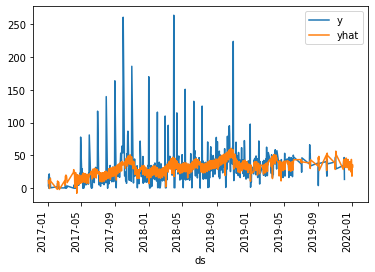

In [180]:
pd.concat([data1.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()
plt.xticks(rotation=90)

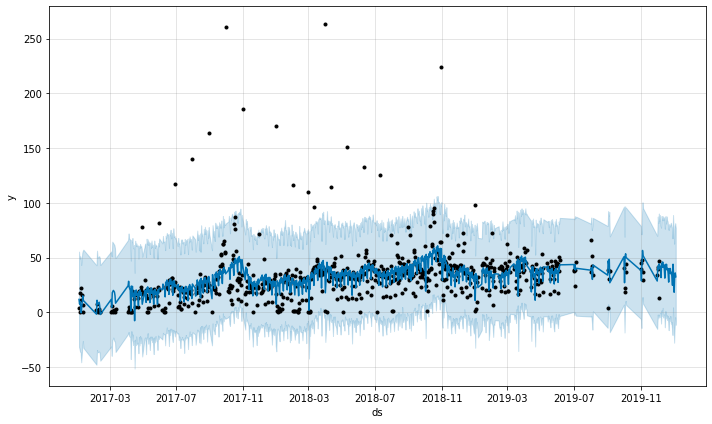

In [181]:
fig1=model_seg1.plot(forecast)
#Seasonality is captured well
#Has not detected the outliers

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



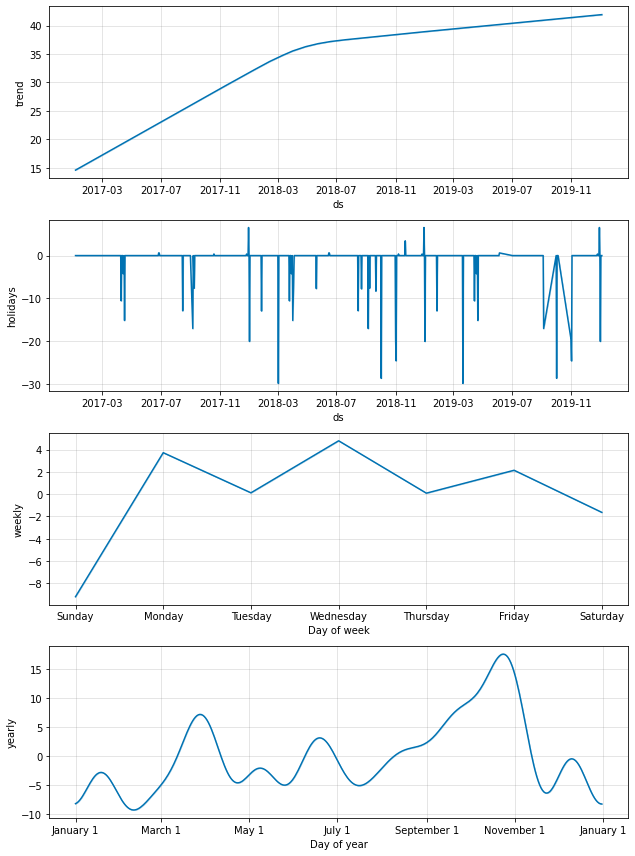

In [182]:
fig2=model_seg1.plot_components(forecast)

Here, the model obtained using the default holiday list which accounts for only Diwali and Holi capture the Sesonality well at some points but doesnt capture the outliers and the trend in the data.

Hence we are going to feed the model with holiday list specific to India between the period 2017 to 2019.

In [183]:
#Holiday list India 
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2018-01-01','2018-01-14','2018-01-26','2018-02-14','2018-03-02','2018-03-18',
    '2018-03-25','2018-03-29','2018-03-30','2018-04-30','2018-05-01','2018-06-16','2018-07-14','2018-08-15',
    '2018-08-22','2018-08-25','2018-08-26','2018-09-03','2018-09-13','2018-09-21','2018-10-02','2018-10-19',
    '2018-11-07','2018-11-21','2018-11-23','2018-12-25','2019-01-01','2019-01-14','2019-01-26','2019-03-04',
    '2019-03-21','2019-04-06','2019-04-13','2019-04-17','2019-04-19','2019-05-01','2019-05-18','2019-06-05',
    '2019-07-04','2019-08-12','2019-08-15','2019-08-24','2019-09-02','2019-09-10','2019-09-11','2019-10-02',
    '2019-10-08','2019-10-27','2019-11-10','2019-11-12','2019-12-25','2017-01-01','2017-01-14','2017-01-26',
    '2017-02-24','2017-03-13','2017-03-28','2017-04-05','2017-04-09','2017-04-14','2017-05-01','2017-05-10',
    '2017-06-25','2017-06-26','2017-08-07','2017-08-14','2017-08-15','2017-08-25','2017-09-02','2017-09-04',
    '2017-09-30','2017-10-01','2017-10-02','2017-10-19','2017-12-01','2017-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

In [184]:
model_seg1_holidays = Prophet(interval_width=0.95, holidays = holidays)

In [185]:
model_seg1_holidays.fit(data1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [186]:
model_seg1_holidays.params

{'beta': array([[-0.0158202 , -0.00430451, -0.00631828, -0.0182499 ,  0.00384745,
         -0.00714791,  0.00095364,  0.0097492 ,  0.00620578,  0.00715712,
         -0.0037793 , -0.0009608 , -0.00118828, -0.00698795, -0.00431322,
         -0.00354834,  0.00534335, -0.00222595,  0.0021498 , -0.00324301,
         -0.01051142,  0.00974953,  0.00881808, -0.00390414, -0.014554  ,
         -0.00595514, -0.00743135, -0.01098561]]),
 'delta': array([[ 1.88579027e-08, -1.62917162e-09, -2.81898352e-07,
         -8.75945208e-08, -9.97025600e-06, -6.80518847e-06,
         -9.05720655e-06, -2.40729788e-06, -1.33420527e-04,
         -9.37204802e-05, -1.66039576e-03, -7.68460601e-03,
         -1.64639222e-02, -3.13362589e-02, -2.92698332e-02,
         -2.43194539e-02, -2.00113365e-02, -1.30916497e-02,
         -3.78203211e-03, -1.13287758e-06, -7.71250658e-07,
         -2.51832704e-03, -8.80168533e-03, -9.35441040e-03,
         -4.94899876e-03]]),
 'k': array([[0.18314049]]),
 'm': array([[0.05688269

In [187]:
#Forecasting for the the next 30 days 
future1 = model_seg1_holidays.make_future_dataframe(periods=30, freq='D')

In [188]:
future1

,ds
0,2017-01-04
1,2017-01-05
2,2017-01-06
3,2017-01-07
4,2017-01-08
...,...
801,2019-12-31
802,2020-01-01
803,2020-01-02
804,2020-01-03


In [189]:
forecast1=model_seg1_holidays.predict(future)
forecast1[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-04,12.630399,-31.810462,58.015171
1,2017-01-05,8.155969,-32.150372,53.999560
2,2017-01-06,10.271089,-34.443623,52.953691
3,2017-01-07,7.688198,-34.665635,51.424783
4,2017-01-08,0.101985,-43.998632,43.164177
...,...,...,...,...
801,2019-12-31,31.763687,-11.449838,79.118171
802,2020-01-01,36.517021,-7.733754,78.801137
803,2020-01-02,31.778399,-12.717266,74.951592
804,2020-01-03,33.659586,-12.922226,74.674498


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]),
 <a list of 10 Text major ticklabel objects>)

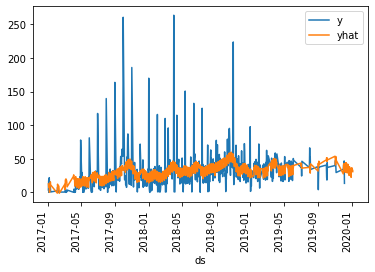

In [190]:
pd.concat([data1.set_index('ds')['y'],forecast1.set_index('ds')['yhat']],axis=1).plot()
plt.xticks(rotation=90)

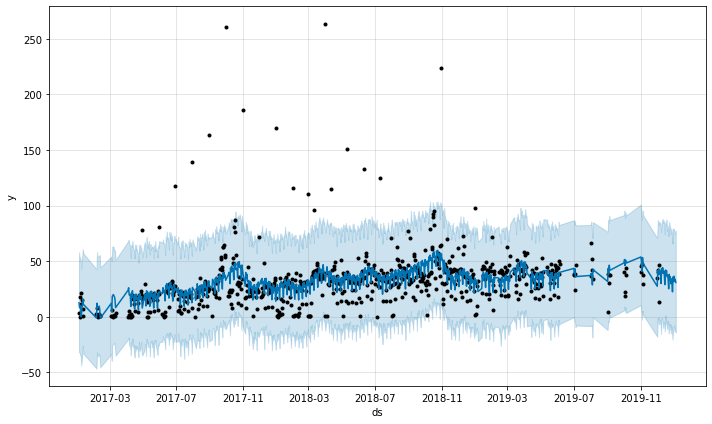

In [191]:
fig3=model_seg1_holidays.plot(forecast1)
#Seasonality is captured well
#Has not detected the outliers

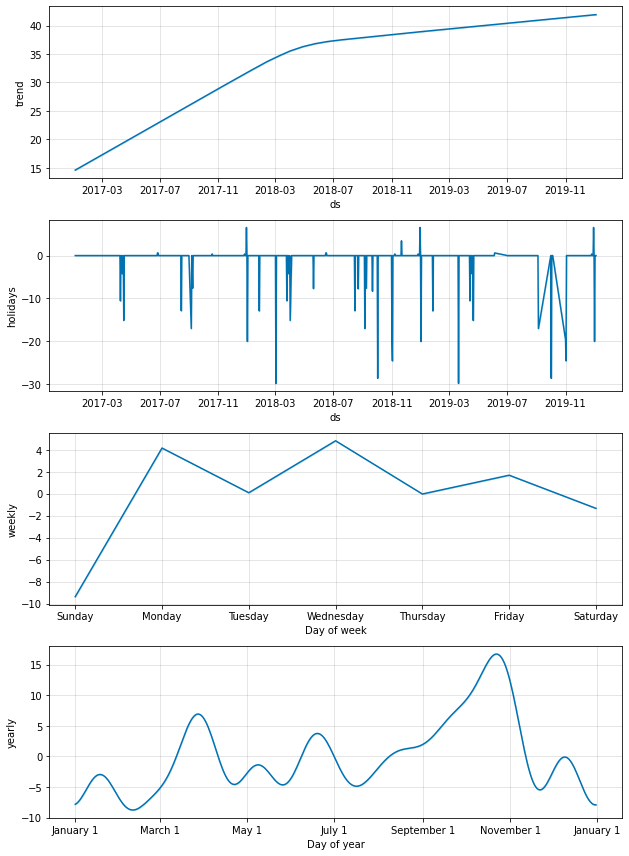

In [192]:
fig4=model_seg1_holidays.plot_components(forecast)

Here taking the values from 750 days and predicting the futher 55 days.

In [193]:
from fbprophet.diagnostics import cross_validation, performance_metrics
results= cross_validation(model =model_seg1_holidays ,initial = '750 days' ,horizon = '55 days')
df_p=performance_metrics(results)
df_p

INFO:fbprophet:Making 10 forecasts with cutoffs between 2019-02-05 12:00:00 and 2019-10-11 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days 12:00:00,107.736453,10.379617,8.752401,0.270392,0.165680,1.0
1,8 days 00:00:00,106.665053,10.327877,8.879367,0.266205,0.191923,1.0
2,8 days 12:00:00,108.009122,10.392744,8.910316,0.263151,0.187465,1.0
3,9 days 00:00:00,111.027285,10.536949,9.159066,0.270841,0.200863,1.0
4,9 days 12:00:00,102.806932,10.139375,8.905764,0.255353,0.187465,1.0
...,...,...,...,...,...,...,...
90,53 days 00:00:00,149.260315,12.217214,9.964760,0.277476,0.239683,1.0
91,53 days 12:00:00,139.981704,11.831386,9.594303,0.262552,0.213840,1.0
92,54 days 00:00:00,137.465146,11.724553,9.369495,0.283418,0.213840,1.0
93,54 days 12:00:00,146.336551,12.096965,9.819496,0.306787,0.226222,1.0


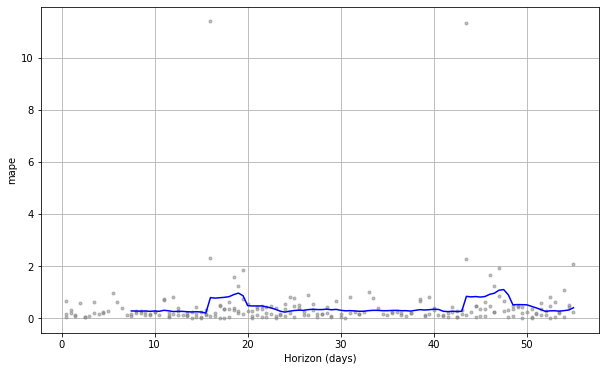

In [194]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(results, metric='mape')

Here we plot the mean of the metric and the grey points are the error points.

In [195]:
import numpy as np
residual = (results['y'])- (results['yhat'])
print("MAPE:",round(np.mean(abs(residual/results['yhat'])),4))
print('RMSE:', np.sqrt(np.mean(residual**2)))

MAPE: 0.2389
RMSE: 13.453726521017115


In [196]:

EPSILON = 1e-10

print('SMAPE', np.mean(2.0 * np.abs(results['y'] - results['yhat']) / ((np.abs(results['y']) + np.abs(results['yhat'])) + EPSILON)))


SMAPE 0.27560745525467667


> SEGMENT 2

In [197]:
data2.tail

<bound method NDFrame.tail of             ds          y
0   2017-01-04    56.0625
1   2017-01-05    84.6250
2   2017-01-06   265.3125
3   2017-01-07   129.5625
4   2017-01-08   278.4375
..         ...        ...
809 2019-12-02  1094.4375
810 2019-12-03  1992.4375
811 2019-12-04  1289.8750
812 2019-12-05   743.2500
813 2019-12-06  1605.0000

[814 rows x 2 columns]>

ADF test for segment 2

In [198]:
Y = data2["y"].values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.126543
p-value: 0.000875
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Ho - Time Series is Stationary


In [199]:
model_seg2_holidays = Prophet(interval_width=0.95, holidays = holidays)

In [200]:
model_seg2_holidays.fit(data2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [201]:
model_seg2_holidays.params

{'beta': array([[-0.00242293,  0.02707235, -0.020414  ,  0.00576979, -0.03001534,
         -0.01706035, -0.02575637, -0.0097763 ,  0.00103414, -0.00894138,
          0.00485277, -0.01082062, -0.00172289, -0.02050917, -0.01737167,
         -0.01895017, -0.00130633, -0.01886376,  0.01206018, -0.02563208,
         -0.00848995,  0.03111438,  0.01886128, -0.01725818, -0.01949002,
          0.00539969, -0.02139792, -0.0469912 ]]),
 'delta': array([[-7.88248100e-09, -1.22652637e-08, -4.21187718e-08,
         -1.31019832e-08, -1.61596202e-07, -9.62487907e-08,
         -5.12543995e-08, -2.07279944e-05, -2.00327422e-07,
          2.17401742e-08, -2.01501712e-05, -3.08593212e-05,
         -8.15469646e-03, -2.09576522e-02, -3.80443223e-02,
         -5.38347552e-02, -6.70071606e-02, -7.67859129e-02,
         -8.02725840e-02, -8.01229818e-02, -7.66234241e-02,
         -6.82714606e-02, -5.79818345e-02, -4.51360846e-02,
         -2.66853496e-02]]),
 'k': array([[0.56194174]]),
 'm': array([[0.13660698

In [202]:
#Forecasting for the the next 30 days 
future2 = model_seg2_holidays.make_future_dataframe(periods=30, freq='D')

In [203]:
future2

,ds
0,2017-01-04
1,2017-01-05
2,2017-01-06
3,2017-01-07
4,2017-01-08
...,...
839,2020-01-01
840,2020-01-02
841,2020-01-03
842,2020-01-04


In [204]:
forecast2=model_seg2_holidays.predict(future2)
forecast2[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-04,139.037881,-1033.790252,1207.910121
1,2017-01-05,160.879480,-874.979931,1229.897516
2,2017-01-06,182.619001,-998.509413,1222.266385
3,2017-01-07,172.445676,-922.706883,1191.975243
4,2017-01-08,-43.552345,-1066.375367,1065.753793
...,...,...,...,...
839,2020-01-01,828.355791,-250.594829,1941.333624
840,2020-01-02,827.934777,-205.897996,1942.481439
841,2020-01-03,828.470345,-216.760717,1917.126438
842,2020-01-04,798.547862,-257.569075,1842.320365


In [213]:
segment1=forecast1[['ds','yhat']]
segment1.to_csv('segment11.csv')
segment2=forecast1[['ds','yhat']]
segment2.to_csv('segment22.csv')

(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]),
 <a list of 10 Text major ticklabel objects>)

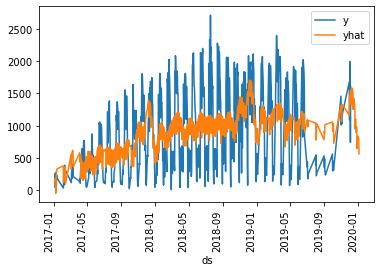

In [206]:
pd.concat([data2.set_index('ds')['y'],forecast2.set_index('ds')['yhat']],axis=1).plot()
plt.xticks(rotation=90)

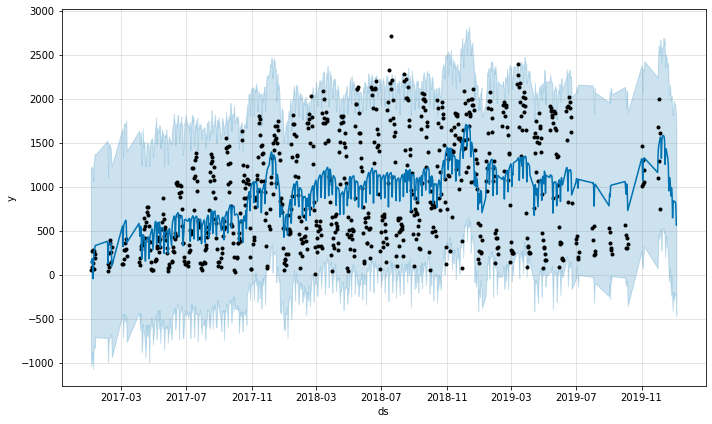

In [207]:
fig5=model_seg2_holidays.plot(forecast2)

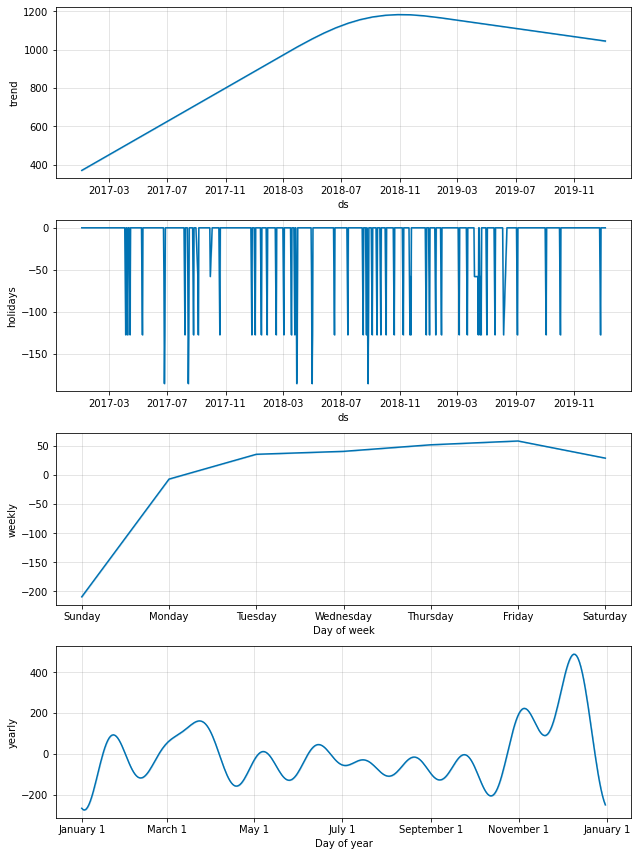

In [208]:
fig6=model_seg2_holidays.plot_components(forecast2)

In [209]:
from fbprophet.diagnostics import cross_validation, performance_metrics
results1= cross_validation(model =model_seg2_holidays ,initial = '800 days' ,horizon = '45 days')
df_p1=performance_metrics(results1)
df_p1

INFO:fbprophet:Making 10 forecasts with cutoffs between 2019-04-02 12:00:00 and 2019-10-22 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 12:00:00,737594.457037,858.833195,748.920387,2.387409,1.497297,0.627451
1,4 days 00:00:00,701707.539082,837.679855,729.314551,2.259546,1.497297,0.705882
2,4 days 12:00:00,755223.824282,869.036147,788.257390,2.424798,1.497297,0.676471
3,5 days 00:00:00,806149.176803,897.858105,818.482503,3.285254,1.993689,0.647059
4,5 days 12:00:00,799167.061795,893.961443,829.672196,3.255504,1.993689,0.676471
...,...,...,...,...,...,...,...
75,43 days 00:00:00,738536.244392,859.381315,780.076926,2.458507,1.546120,0.705882
76,43 days 12:00:00,710129.289559,842.691693,758.385996,2.340841,1.126869,0.705882
77,44 days 00:00:00,735854.278404,857.819491,774.265641,2.443749,1.081838,0.705882
78,44 days 12:00:00,695471.748405,833.949488,751.676948,2.220414,0.311874,0.745098


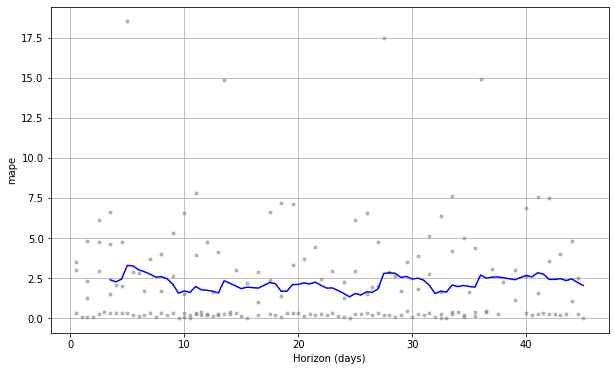

In [210]:
from fbprophet.plot import plot_cross_validation_metric
fig7 = plot_cross_validation_metric(results1, metric='mape')

In [211]:
import numpy as np
residual1 = (results1['y'])- (results1['yhat'])
print("MAPE:",round(np.mean(abs(residual1/results1['yhat'])),4))
print('RMSE:', np.sqrt(np.mean(residual1**2)))

MAPE: 0.4921
RMSE: 777.1000311862828


In [212]:

EPSILON = 1e-10

print('SMAPE', np.mean(2.0 * np.abs(results1['y'] - results1['yhat']) / ((np.abs(results1['y']) + np.abs(results1['yhat'])) + EPSILON)))

SMAPE 0.7110438001578006
